In [1]:
'''Importar los módulos necesarios'''
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import graphviz
%matplotlib 
import networkx as nx
from networkx.drawing.nx_pydot import write_dot

import pandas as pd
import seaborn as sn


Using matplotlib backend: nbAgg


In [2]:
'''#Lectura del dataset e imprime el dataset'''

df = pandas.read_csv('Dataset_Estado.csv')    
print(df)  

     Edad     Genero  Amabilidad  Social  Comunicativo  Bondadoso  Divertido  \
0      23   Femenino           7       8             5          4          7   
1      26  Masculino           6       6             8          5          8   
2      27   Femenino           4       6             7          7          5   
3      27   Femenino           6       7             8          6          8   
4      25  Masculino           8       4             5          8          5   
..    ...        ...         ...     ...           ...        ...        ...   
995    45   Femenino           6       5             6          8          8   
996    39  Masculino           1       4             4          6          6   
997    44  Masculino           5       1             4          1          5   
998    37   Femenino           7       6             4          6          6   
999    39  Masculino           1       4             4          6          6   

      Animo  
0    Alegre  
1    Triste

In [3]:
'''Función para convertir valores de cadena en numéricos, se toma la segunda columna del dataset y se transforma los valores de  género en 1 y 0 en el cambio_valores(d1, d5) '''

d1 = {'Masculino': 1, 'Femenino': 0}
df['Genero'] = df['Genero'].map(d1)   

'''Se guarda el contenido en una variable, Se imprime el título para la columna'''
res=df['Genero']             
print("Genero: \n", res)              
    
'''Se toma la sexta columna del dataset y se transforma los valores de las categorías de personalidad en 0, 1 y 2'''
d5 = {'Alegre': 0, 'Triste': 1, 'Normal': 2}
df['Animo'] = df['Animo'].map(d5)

'''Se guarda el contenido en una variable, Se imprime el título para la columna'''
res2=df['Animo']         
print("Animo \n", res2)      

Genero: 
 0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    1
997    1
998    0
999    1
Name: Genero, Length: 1000, dtype: int64
Animo 
 0      0
1      1
2      1
3      1
4      2
      ..
995    1
996    2
997    2
998    2
999    2
Name: Animo, Length: 1000, dtype: int64


In [4]:
'''Elegir las características, es decir, las columnas a partir de las cuales intentamos predecir Se debe colocar en la entrada de la función, las variables que se van a usar'''

features = ['Amabilidad', 'Social', 'Comunicativo', 'Bondadoso', 'Divertido']

x = df[features]
y = df['Animo']

'''Se crea el árbol de decisión delimitando el arbol a maximo 2 hijos'''

dtree = DecisionTreeClassifier(max_depth=2)
    
'''Se guarda el árbol en una varibale y #se retorna la variable que contiene los valores del árb'''

dtree = dtree.fit(x, y)  

In [5]:
'''función para guardar el árbol creado, en una extensión png, Se usa la variable de la función anterior'''

data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
    
'''Se le da nombre al archivo que contiene la imagen del árbol'''

graph.write_png('mydecisiontree.png')   

True

<IPython.core.display.Javascript object>


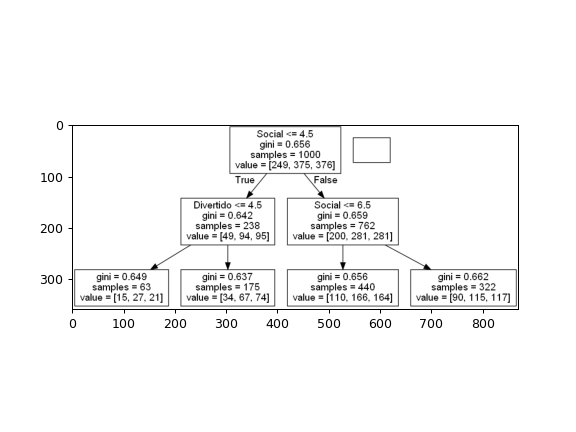

In [6]:
'''función para presentar el árbol en pantalla, se manda a llamar la imagen creada anteriormente'''

img = pltimg.imread('mydecisiontree.png')    

'''se crea el plano donde se presenta la imagen y se manda a mostrar la gráfica'''    

imgplot = plt.imshow(img)     
plt.show()      


In [ ]:
data = {'y_Actual':  y   ,
        'y_Predicted': res2 
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()